In [160]:
import numpy as np # библиотека для работы с чиселками
import pandas as pd # data processing, работа с CSV файлами
import matplotlib.pyplot as plt # для графики
import ast
import json


import warnings
warnings.simplefilter(action='ignore')

In [161]:
dataset = pd.read_excel("./1 день/train_dataset/static_data/train_test_static_data.xlsx", engine='openpyxl')
dataset.head(5)

,ID скважины,Паспортные данные ЭЦН,Характеристики ПЭД,Инклинометрия,ЭК,НКТ,Пакер,Количество ступеней насоса,Сепаратор,КПД станции управления,...,Глубина установки насоса,Удельное сопротивление кабеля,Длина кабеля,Относительная плотность газа,Относительная плотность нефти,Относительная плотность воды,Пластовое давление,Пластовая температура,Штуцер,Линейная температура
0,10001,"{'name': 'ЭЦНМТ 5А-200DP', 'rate_nom_sm3day': ...","{""manufacturer"": ""\u0421\u0426 \u042d\u041f\u0...","{'measured': [10.0, 20.0, 30.0, 40.0, 50.0, 60...","{'bottom_depth': 2806.6, 'sections_info': [{'M...","{'bottom_depth': 2720.69, 'sections_info': [{'...",False,453,"{'k_gas_sep': 0.5, 'sep_name': 'ГСМТ-5А-250'}",0.97,...,2751.61,0.000000,2760,0.7,0.828,1.021,179.900000,97.0,{'d': 32.0},16.8802
1,10002,"{'name': 'ЭЦН5А-200', 'rate_nom_sm3day': 200.0...","{""manufacturer"": ""\u041b\u044b\u0441\u044c\u04...","{'measured': [0.0, 10.0, 20.0, 30.0, 40.0, 50....","{'bottom_depth': 3414.0, 'sections_info': [{'M...","{'bottom_depth': 3069.62, 'sections_info': [{'...",False,387,"{'k_gas_sep': None, 'sep_name': '310МНГСЛ5ИМ'}",0.97,...,3095.74,3.086687,3230,0.7,0.851,1.017,149.000000,89.0,{'d': 18.0},5.0000
2,10003,"{'name': '30.1ЭЦНДИ5А-160М', 'rate_nom_sm3day'...","{""manufacturer"": ""\u0411\u043e\u0440\u0435\u04...","{'measured': [0.0, 10.0, 20.0, 30.0, 40.0, 50....","{'bottom_depth': 3339.3, 'sections_info': [{'M...","{'bottom_depth': 3109.34, 'sections_info': [{'...",False,459,"{'k_gas_sep': 0.65, 'sep_name': 'ГСВБ5А-250И'}",0.97,...,3137.14,2.002203,3178,0.7,0.851,1.017,146.000000,89.0,{'d': 18.0},5.0000
3,10004,"{'name': 'ВНН5А-100', 'rate_nom_sm3day': 100.0...","{""manufacturer"": ""\u041d\u043e\u0432\u043e\u04...","{'measured': [0.0, 79.68, 104.35, 129.01, 153....","{'bottom_depth': 3343.89, 'sections_info': [{'...","{'bottom_depth': 3004.59, 'sections_info': [{'...",False,384,"{'k_gas_sep': None, 'sep_name': 'ГН5А-350-22.1...",0.97,...,3025.85,2.913186,3007,0.7,0.868,1.011,181.995048,84.0,NaN,5.1522
4,10005,"{'name': 'ЭЦНМТ 5А-80DP', 'rate_nom_sm3day': 8...","{""manufacturer"": ""Schlumberger"", ""name"": ""\u04...","{'measured': [50.0, 60.0, 70.0, 80.0, 90.0, 10...","{'bottom_depth': 2656.0, 'sections_info': [{'M...","{'bottom_depth': 2348.21, 'sections_info': [{'...",False,461,"{'k_gas_sep': 0.5, 'sep_name': 'ГСМТ-5А-250'}",0.97,...,2368.63,2.500000,2354,0.7,0.830,1.023,207.300000,80.0,{'d': 32.0},5.0000


In [162]:
def safe_parse(val):
    try:
        return json.loads(val)
    except json.JSONDecodeError:
        try:
            return ast.literal_eval(val)
        except Exception as e:
            print("Ошибка для значения:", val)
            print("Причина:", e)
            return None

def expand_dict_column(dataset, column_name):
    if column_name in dataset.columns:
        dataset[column_name] = dataset[column_name].apply(
            lambda x: safe_parse(x) if isinstance(x, str) else x
        )

    # Разделим словари по ключам
    expanded_part = dataset[column_name].apply(pd.Series)


    # Найдём индексы колонок до и после
    col_index = dataset.columns.get_loc(column_name)
    cols_before = dataset.iloc[:, :col_index]
    cols_after = dataset.iloc[:, col_index + 1:]

    # Соберём обратно
    dataset = pd.concat([cols_before, expanded_part, cols_after], axis=1)
    return dataset

dataset = expand_dict_column(dataset, 'Паспортные данные ЭЦН')
dataset = expand_dict_column(dataset, 'Инклинометрия')
dataset = expand_dict_column(dataset, 'ЭК')
dataset = expand_dict_column(dataset, 'НКТ')

dataset.columns.values[20] = 'NKT_bottom_depth'
dataset.columns.values[21] = 'NKT_sections_info'
dataset.columns.values[22] = 'NKT_roughness'

def parse_sections(row):
    try:
        if isinstance(row, str):
            return ast.literal_eval(row)
        return row
    except (ValueError, SyntaxError):
        return []

dataset['sections_info'] = dataset['sections_info'].apply(parse_sections)
dataset['NKT_sections_info'] = dataset['NKT_sections_info'].apply(parse_sections)

dataset['Сепаратор'] = dataset['Сепаратор'].apply(lambda x: "{'k_gas_sep': None, 'sep_name': 'ГН5А-350-22.13/273-3'}" if pd.isna(x) else x)
dataset = expand_dict_column(dataset, 'Сепаратор')

column_name = 'Штуцер'
#Заменяем все Nan на {"d": 0.0}
dataset[column_name] = dataset[column_name].apply(lambda x: "{'d': 0.0}" if pd.isna(x) else x)
# 2. Преобразуем строки в словари
dataset[column_name] = dataset[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# 3. Если это словарь с 1 ключом — извлекаем значение
dataset[column_name] = dataset[column_name].apply(
    lambda x: list(x.values())[0] if isinstance(x, dict) and len(x) == 1 else x
)
for i in range (0, len(dataset[column_name])):
    if dataset[column_name][i] == 0.0:
        #print(dataset['NKT_sections_info'].iloc[i][0]['d'])
        dataset[column_name][i] = dataset['NKT_sections_info'].iloc[i][0]['d']
    #print(dataset['Штуцер'][i])

dataset = expand_dict_column(dataset, 'Характеристики ПЭД')
dataset.columns.values[15] = 'name_PED'
dataset.columns.values[27] = 'eff_points_PED'
dataset = dataset.drop(columns=['sep_name'])
dataset['k_gas_sep'] = dataset['k_gas_sep'].fillna(0.7)


In [163]:
dataset.columns.tolist()


['ID скважины',
 'name',
 'rate_nom_sm3day',
 'rate_opt_min_sm3day',
 'rate_opt_max_sm3day',
 'freq_Hz',
 'rate_points',
 'head_points',
 'power_points',
 'eff_points',
 'stages_max',
 'rate_max_sm3day',
 'slip_nom_rpm',
 'eff_max',
 'manufacturer',
 'name_PED',
 'd_motor_mm',
 'motor_nom_i',
 'motor_amp_idle',
 'motor_nom_power',
 'motor_nom_voltage',
 'motor_nom_eff',
 'motor_nom_cosf',
 'motor_nom_freq',
 'load_points',
 'amperage_points',
 'cosf_points',
 'eff_points_PED',
 'rpm_points',
 'measured',
 'absolute',
 'bottom_depth',
 'sections_info',
 'roughness',
 'NKT_bottom_depth',
 'NKT_sections_info',
 'NKT_roughness',
 'Пакер',
 'Количество ступеней насоса',
 'k_gas_sep',
 'КПД станции управления',
 'КПД трансформатора',
 'Глубина установки насоса',
 'Удельное сопротивление кабеля',
 'Длина кабеля',
 'Относительная плотность газа',
 'Относительная плотность нефти',
 'Относительная плотность воды',
 'Пластовое давление',
 'Пластовая температура',
 'Штуцер',
 'Линейная температура

In [164]:
pd.options.display.max_rows = 100

In [165]:
dataset['rate_nom_sm3day']


0     200.0
1     200.0
2     160.0
3     100.0
4      85.0
5      80.0
6      60.0
7     200.0
8     160.0
9      80.0
10    200.0
11     85.0
12     80.0
13    124.0
14     80.0
15     80.0
16     59.0
17     85.0
18    250.0
19     44.0
20     79.0
21     60.0
22     79.0
23     80.0
24     60.0
25    125.0
26    165.0
27     85.0
28     80.0
29    200.0
30    200.0
31     80.0
32    125.0
33     80.0
34    125.0
35     60.0
36     80.0
37     79.0
38     60.0
39     45.0
40    280.0
41     59.0
42    100.0
43     80.0
44    160.0
45     45.0
46     80.0
47     59.0
48    200.0
49     35.0
50    100.0
51     80.0
52    125.0
53     80.0
54     66.0
55     45.0
56     80.0
57    159.0
58    320.0
59    320.0
60     60.0
61     60.0
62    100.0
63     80.0
64     80.0
65     44.0
66    100.0
67     60.0
68     60.0
69    100.0
70    125.0
71    125.0
72    124.0
73    124.0
74     80.0
75    100.0
76    125.0
77     80.0
78     85.0
79     85.0
80    125.0
81     60.0
82     59.0
83  

In [189]:
dataset.to_csv('changed_static_dataset_v2.csv', index=False, encoding='utf-8-sig')

In [170]:
dataset.head()

,ID скважины,name,rate_nom_sm3day,rate_opt_min_sm3day,rate_opt_max_sm3day,freq_Hz,rate_points,head_points,power_points,eff_points,...,Глубина установки насоса,Удельное сопротивление кабеля,Длина кабеля,Относительная плотность газа,Относительная плотность нефти,Относительная плотность воды,Пластовое давление,Пластовая температура,Штуцер,Линейная температура
0,10001,ЭЦНМТ 5А-200DP,200.0,161.0,260.0,50.0,"[10.865, 21.729, 32.594, 43.458, 54.323, 65.18...","[7.107, 7.073, 7.033, 6.993, 6.957, 6.929, 6.9...","[0.11800000000000001, 0.129, 0.139, 0.148, 0.1...","[0.07424, 0.13540000000000002, 0.1873300000000...",...,2751.61,0.000000,2760,0.7,0.828,1.021,179.900000,97.0,32.0,16.8802
1,10002,ЭЦН5А-200,200.0,150.0,250.0,50.0,"[0.0, 100.0, 150.0, 200.0, 250.0, 300.0]","[6.02, 5.95, 5.69, 4.82, 3.43, 1.77]","[0.0951, 0.1472, 0.17400000000000002, 0.1832, ...","[0.0, 0.46, 0.56, 0.6000000000000001, 0.53, 0.31]",...,3095.74,3.086687,3230,0.7,0.851,1.017,149.000000,89.0,18.0,5.0000
2,10003,30.1ЭЦНДИ5А-160М,160.0,125.0,200.0,50.0,"[0.0, 50.0, 75.0, 100.0, 125.0, 150.0, 160.0, ...","[6.4, 6.5, 6.55, 6.55, 6.4, 5.9, 5.6, 5.0, 3.7...","[0.09870000000000001, 0.127, 0.1386, 0.1523000...","[0.0, 0.29050000000000004, 0.40230000000000005...",...,3137.14,2.002203,3178,0.7,0.851,1.017,146.000000,89.0,18.0,5.0000
3,10004,ВНН5А-100,100.0,70.0,140.0,50.0,"[0.0, 40.0, 70.0, 100.0, 140.0, 160.0]","[8.39, 8.68, 8.35, 7.41, 5.08, 3.24]","[0.1061, 0.1217, 0.1326, 0.1451, 0.1655, 0.1769]","[0.0, 0.32, 0.5, 0.584, 0.49, 0.33]",...,3025.85,2.913186,3007,0.7,0.868,1.011,181.995048,84.0,62.0,5.1522
4,10005,ЭЦНМТ 5А-80DP,85.0,53.0,113.0,50.0,"[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 53.0, 60.0...","[7.17, 7.09, 7.02, 6.99, 6.95, 6.88, 6.83, 6.7...","[0.06, 0.06, 0.07, 0.07, 0.08, 0.08, 0.09, 0.0...","[0.0057, 0.1273, 0.2359, 0.3199, 0.4001, 0.466...",...,2368.63,2.500000,2354,0.7,0.830,1.023,207.300000,80.0,32.0,5.0000


In [175]:
dataset['rate_points'][0]

[10.865,
 21.729,
 32.594,
 43.458,
 54.323,
 65.187,
 76.052,
 86.916,
 97.781,
 108.646,
 119.51,
 130.375,
 141.239,
 152.104,
 162.968,
 173.833,
 184.697,
 195.562,
 206.427,
 217.291,
 228.156,
 239.02,
 249.885,
 260.749,
 271.614,
 282.479,
 293.343,
 304.208,
 315.072,
 325.937]

In [176]:
dataset['head_points'][0]

[7.107,
 7.073,
 7.033,
 6.993,
 6.957,
 6.929,
 6.908,
 6.893,
 6.884,
 6.877,
 6.867,
 6.852,
 6.8260000000000005,
 6.785,
 6.7219999999999995,
 6.635,
 6.516,
 6.362,
 6.168,
 5.93,
 5.643,
 5.305,
 4.913,
 4.463,
 3.954,
 3.382,
 2.747,
 2.046,
 1.278,
 0.441]

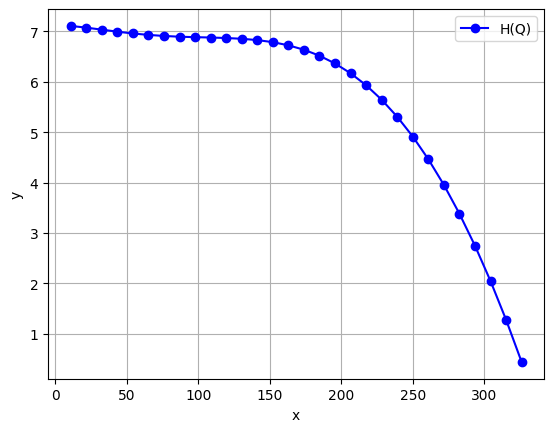

In [177]:
x = dataset['rate_points'][0]
y = dataset['head_points'][0]
# Строим график
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='H(Q)')
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


In [178]:
from scipy.interpolate import interp1d

# Создаём интерполяционную функцию
f = interp1d(x, y, kind='linear')  # Можно заменить на 'cubic' для гладкости

# Пример: получить y при x = 150
x_new = 150
y_new = f(x_new)

print(f"y({x_new}) = {y_new}")


y(150) = 6.7929396226415095


In [188]:
for i in range (0, len(dataset['measured'])):
    dataset['measured'][i] = max(dataset['measured'][i])